# NBA Sports Betting Analysis: How accurate are betting odds for NBA games?
GitHub Repo: https://github.com/ihern/418-Project.git 

UIC CS 418, Spring 2024

Group 12: 
- **Ronak Chaudhuri**, rchau5@uic.edu, RonakChaudhuri
- **Isaias Hernandez**, iherna50@uic.edu, ihern
- **Kevin Pereira**, kperei2@uic.edu, kperei2
- **Brandon Rosero**, broser2@uic.edu, brandon-rosero
- **Muhammad Sharif**, mhari8@uic.edu, msharitenn 

## Introduction

This project serves to analyze how proficient sportsbooks betting odd creators are at creating accurate NBA betting lines and to determine whether these betting lines provide suitable opportunities for the average bettor. This project explores various subtopics that deal with how various aspects of an NBA game affect the betting lines provided by sportsbooks.

## Changes Since Proposal

None



## Data

How we prepared our data was accumlated and combined through various ways. The main way that we put together data was by getting csv files and putting them into Google Sheets/Excel. We would also add necessary columns to the table through information found in the other data columns. If we weren't able to get csv files straight away, we would import the file through Google Sheets/Excel through a website url and create the table that way.  

## Exploratory Data Analysis and Visualizations

Small explanation of some betting concepts:

Money Line Odds: These are used by bookmakers to represent the probability of a particular outcome in a sporting event typically a win by either team or participant. The odds reflect the expected likelihood of various outcomes according to the bookmaker, which incorporates historical performance, player streaks, and other factors. Bettors use these odds to make informed decisions on which bets might offer favorable returns.

Player Win Streaks: A player or team's winning streak is a significant factor that can influence money line odds. A longer winning streak might lead to shorter odds (less payout for a win) because the player or team is perceived as more likely to continue their winning ways. Conversely, betting on players or teams with shorter win streaks (or on a losing streak) might offer longer odds (higher payout for a win), reflecting a perceived higher risk of continuing to lose.

The relationship between money line odds and win streaks is a dynamic aspect of sports betting, where bookmakers adjust odds based on recent performances among other factors. While the money line offers a direct insight into the expected outcome from the bookmakers' perspective, win streaks provide bettors with context to assess the form and momentum of the players or teams involved.

Our anaylsis:
It seems like with our won anaylsis of year 2021-2022, when players are on a winning streak it might affect how people bet on games shown by changes in betting odds. But to really understand how much of an effect these streaks have, we need to do more detailed math and analysis. it looks like the longer a player keeps winning, the better the betting odds might become. it's not as simple as it seems because many different things could influence this relationship. this also make us ask the question that does team wining have a bigger effect on money lines. At the moment the individual player how very liitle effect on odds. more analysis is need as well as more data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

/var/folders/0n/sd16k7fx6s70hw4kl2ndrpym0000gn/T/ipykernel_35127/2501538840.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Home court advantage is an integral part of a basketball game. Are sportsbooks accurate when it comes to setting betting lines in favor of the home team? (Brandon Rosero)

In [117]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

#clean data by removing games that don't go through march 1st
df = df.drop(df.index[1846:2646])

#clean data further by removing columns
df = df[['Team', 'ML', 'Home/Away']].copy()

filter1 = df['Home/Away'] == 1
filter2 = df['ML'] < 0

df.where(filter1 & filter2, inplace=True)

df = df.dropna()

df = df.groupby('Team')['Home/Away'].count()

df

Team
Atlanta         26
Boston          30
Brooklyn        23
Charlotte       14
Chicago         27
Cleveland       18
Dallas          22
Denver          22
Detroit          4
GoldenState     33
Houston          4
Indiana         22
LAClippers      22
LALakers        27
Memphis         27
Miami           25
Milwaukee       30
Minnesota       20
NewOrleans       8
NewYork         23
OklahomaCity     3
Orlando          4
Philadelphia    21
Phoenix         32
Portland        20
Sacramento      15
SanAntonio      15
Toronto         21
Utah            32
Washington      19
Name: Home/Away, dtype: int64

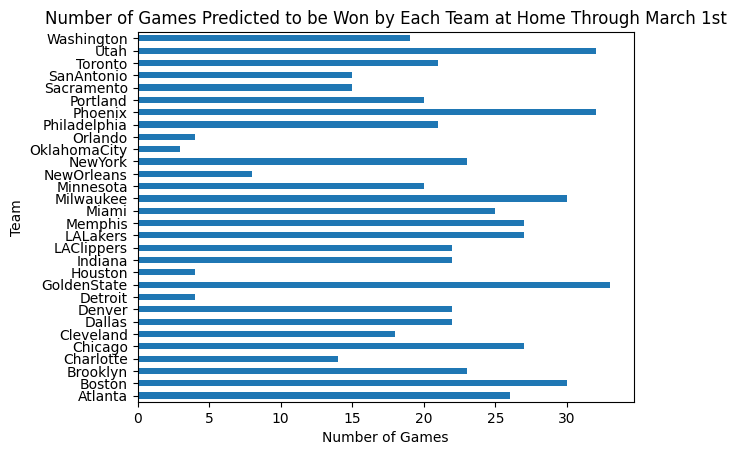

In [113]:
df.plot(kind="barh")

plt.title("Number of Games Predicted to be Won by Each Team at Home Through March 1st")
plt.xlabel("Number of Games")
plt.show()

This barchart shows what a sportsbook thinks in regards to how many games an NBA team is going to win at home up until March 1st of the 2021-2022 season. 

In [114]:
df2 = pd.read_csv('NBA_2021-2022_Actual_Outcomes_updated.csv')


#clean data further by removing columns
df2 = df2[['Home', 'Home/Away']].copy()

filter1 = df2['Home/Away'] == 1

df2.where(filter1, inplace=True)

df2 = df2.dropna()

df2 = df2.groupby('Home')['Home/Away'].count()

df2


Home
Atlanta Hawks             19
Boston Celtics            23
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             27
Cleveland Cavaliers       19
Dallas Mavericks          22
Denver Nuggets            17
Detroit Pistons           11
Golden State Warriors     29
Houston Rockets            9
Indiana Pacers            16
LA Clippers               19
Los Angeles Lakers        18
Memphis Grizzlies         23
Miami Heat                24
Milwaukee Bucks           22
Minnesota Timberwolves    19
New Orleans Pelicans      14
New York Knicks           16
Oklahoma City Thunder     10
Orlando Magic              8
Philadelphia 76ers        18
Phoenix Suns              28
Portland Trail Blazers    16
Sacramento Kings          17
San Antonio Spurs         13
Toronto Raptors           18
Utah Jazz                 24
Washington Wizards        16
Name: Home/Away, dtype: int64

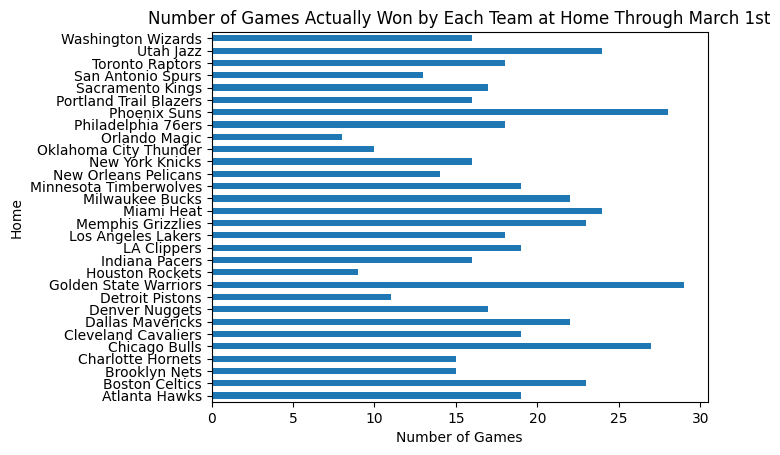

In [115]:
df2.plot(kind="barh")

plt.title("Number of Games Actually Won by Each Team at Home Through March 1st")
plt.xlabel("Number of Games")
plt.show()

This barchart shows how many games an NBA team has actually won at home up until March 1st of the 2021-2022 season.

By comparing both of these barcharts, it can be seen that for a lot of the time, the sportsbook prediction for how many games an NBA team will win at home is accurate. For 10 teams, the sportbook was off by more than or equal to 6 games with the most being a 9 game differential(LA Lakers). However, for 22 teams, the sportsbook was off by less than or equal to 5 games with the least being a 0 game differential(Chicago Bulls and Dallas Mavericks). For most teams, the sportsbook was accurate and a sportsbook user could confidently place their bet on the home team, if they are favored to win by the sportsbook. 

#### Do player hot streaks affect bet outcomes? (Muhammad Sharif)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import csv

/var/folders/0n/sd16k7fx6s70hw4kl2ndrpym0000gn/T/ipykernel_47942/1246412092.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# input_csv_path = 'NBA_2021_2022_Bet_Outcomes.csv'
# output_csv_path = 'NBA_2021_2022_bet_outcomes_corrected_dates.csv'

# def correct_month(month):
#     if month > 50:
#         return month - 50
#     elif month > 40:
#         return month - 40
#     elif month > 30:
#         return month - 30
#     return month

# def correct_day(month, day):

#     month_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 
#                   7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
    
#     if day == 0 or day > month_days.get(month, 31):
#         return 1
#     return day

# def correct_date(mmdd):
#     month = int(mmdd[:2])
#     day = int(mmdd[2:])
#     month = correct_month(month)  
#     day = correct_day(month, day)  
   
#     year = '2021' if month >= 10 else '2022'
#     return f"{month:02d}/{day:02d}/{year}"

# with open(input_csv_path, mode='r', newline='') as infile, open(output_csv_path, mode='w', newline='') as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile)
    
#     header = next(reader)
#     writer.writerow(header)
    
#     for row in reader:
#         row[0] = correct_date(row[0]) 
#         writer.writerow(row)


player_stats = pd.read_csv('2021-22_NBA_Player_Stats_ Per Game.csv')
bet_outcomes = pd.read_csv('NBA_2021_2022_bet_outcomes_corrected_dates.csv')
player_streaks = pd.read_csv('Player_Streak_Stats.csv')

# player_stats.head()
# bet_outcomes.head(2500)
# player_streaks.head()

In [3]:
teamname_mapping = {
    'HOU': 'Houston',
    'OKC': 'OklahomaCity',
    'DAL': 'Dallas',
    'BOS': 'Boston',
    'WAS': 'Washington',
    'LAL': 'LALakers',
    'MIA': 'Miami',
    'POR': 'Portland',
    'PHI': 'Philadelphia',
    'NYK': 'NewYork',
    'LAC': 'LAClippers',
    'GSW': 'GoldenState',
    'MIL': 'Milwaukee',
    'BRK': 'Brooklyn',
    'DEN': 'Denver',
    'NOP': 'NewOrleans',
    'PHO': 'Phoenix',
    'MEM': 'Memphis',
    'TOR': 'Toronto',
    'SAC': 'Sacramento',
    'CHI': 'Chicago',
    'CLE': 'Cleveland',
    'MIN': 'Minnesota',
    'UTA': 'Utah',
    'ATL': 'Atlanta',
    'IND': 'Indiana',
    'CHO': 'Charlotte', 
    'DET': 'Detroit',
    'SAS': 'SanAntonio',  
    'CHA': 'Charlotte', 
    'ORL': 'Orlando',
}

def convert_teamname(team):
    if pd.isna(team) or ',' in team:
        return None
    else:
        return teamname_mapping.get(team, None)

player_streaks['Mapped Team'] = player_streaks['Team'].apply(convert_teamname)
player_streaks_clean = player_streaks.dropna(subset=['Mapped Team'])

bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)

bet_outcomes['Mapped Team'] = bet_outcomes['Team'].map(teamname_mapping).fillna(bet_outcomes['Team'])

bet_outcomes_simplified = bet_outcomes[['Date', 'Mapped Team', 'Final', 'ML']]
player_streaks_simplified = player_streaks_clean[['Player', 'Mapped Team', 'Streak Started', 'Streak Ended']]

streaks_with_bets = pd.DataFrame()
data_to_append = []

for index, streak in player_streaks_simplified.iterrows():
    matching_bets = bet_outcomes_simplified[
        (bet_outcomes_simplified['Mapped Team'] == streak['Mapped Team']) &
        (bet_outcomes_simplified['Date'] >= streak['Streak Started']) &
        (bet_outcomes_simplified['Date'] <= streak['Streak Ended'])
    ]
    for _, bet in matching_bets.iterrows():
        data_to_append.append({
            'Player': streak['Player'],
            'Team': streak['Mapped Team'],
            'Streak Started': streak['Streak Started'],
            'Streak Ended': streak['Streak Ended'],
            'Bet Date': bet['Date'],
            'Final Score': bet['Final'],
            'Money Line': bet['ML']
        })

streaks_with_bets = pd.DataFrame(data_to_append)


print("\nbet Outcomes Date Range:")
print(bet_outcomes['Date'].min(), "to", bet_outcomes['Date'].max())
print("\nunique Teams in Bet Outcomes:")
print(bet_outcomes['Team'].unique())
print("\nunique Teams in Player Streaks:")
print(player_streaks['Team'].unique())
print("\nplayer_streaks date range:")
print(player_streaks[['Player','Streak Started', 'Streak Ended']].head())




bet Outcomes Date Range:
2021-10-01 00:00:00 to 2022-03-01 00:00:00

unique Teams in Bet Outcomes:
['Brooklyn' 'Milwaukee' 'GoldenState' 'LALakers' 'Indiana' 'Charlotte'
 'Chicago' 'Detroit' 'Washington' 'Toronto' 'Boston' 'NewYork' 'Cleveland'
 'Memphis' 'Philadelphia' 'NewOrleans' 'Houston' 'Minnesota' 'Orlando'
 'SanAntonio' 'OklahomaCity' 'Utah' 'Sacramento' 'Portland' 'Denver'
 'Phoenix' 'Dallas' 'Atlanta' 'Miami' 'LAClippers' 'Golden State']

unique Teams in Player Streaks:
['CHI' 'PHI' 'MEM' 'LAL' 'DEN' 'HOU' 'DAL' 'MIL' 'BOS' 'TOR' 'BRK' 'ATL'
 'UTA' 'GSW' 'PHO' 'OKC' 'SAC' 'NOP' 'POR' 'MIN' 'LAC' 'NYK' 'SAS' 'CHO'
 'CLE' 'WAS' 'IND' 'DET' 'MIA']

player_streaks date range:
          Player Streak Started Streak Ended
0  DeMar DeRozan     2022-02-04   2022-02-26
1    Joel Embiid     2021-12-26   2022-01-12
2      Ja Morant     2022-01-19   2022-01-31
3   LeBron James     2021-12-19   2021-12-31
4    Joel Embiid     2022-01-15   2022-01-25


C:\Users\mAs-\AppData\Local\Temp\ipykernel_2128\57099352.py:44: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bet_outcomes['Date'] = pd.to_datetime(bet_outcomes['Date'], dayfirst=True)


Index(['Player', 'Team', 'Streak Started', 'Streak Ended', 'Bet Date',
       'Final Score', 'Money Line', 'Streak Length'],
      dtype='object')


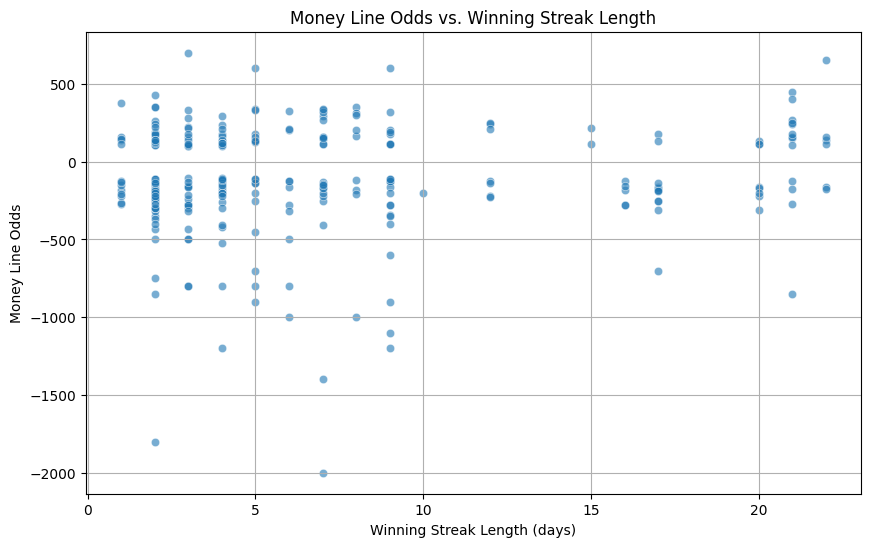

In [4]:
streaks_with_bets['Streak Started'] = pd.to_datetime(streaks_with_bets['Streak Started'])
streaks_with_bets['Streak Ended'] = pd.to_datetime(streaks_with_bets['Streak Ended'])

streaks_with_bets['Streak Length'] = (streaks_with_bets['Streak Ended'] - streaks_with_bets['Streak Started']).dt.days

print(streaks_with_bets.columns)

streaks_with_bets['Money Line'] = pd.to_numeric(streaks_with_bets['Money Line'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Streak Length', y='Money Line', data=streaks_with_bets, alpha=0.6, edgecolor='w')

plt.title('Money Line Odds vs. Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()

The chart visualizes the longest winning streaks of basketball players and it relations with moneyline odds. it show the player with more win streak will often mean higher money line odds

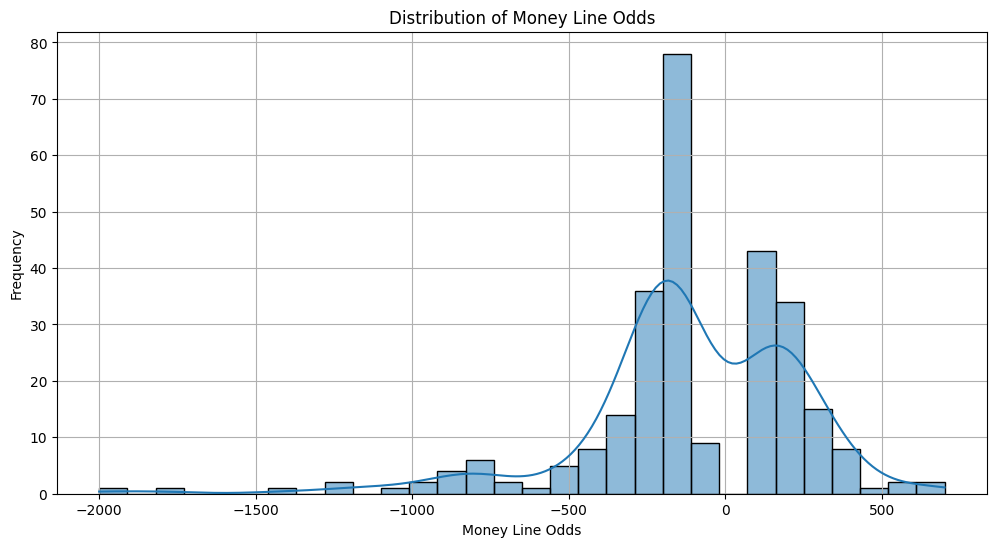

In [5]:
# Distribution of Money Line Odds
plt.figure(figsize=(12, 6))
sns.histplot(streaks_with_bets['Money Line'], bins=30, kde=True)
plt.title('Distribution of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

To visualize how the money line odds are distributed across the dataset, helping to understand the commonality and range of odds offered. this chart provides a detailed look at the odds' spread, highlighting the most common odds given

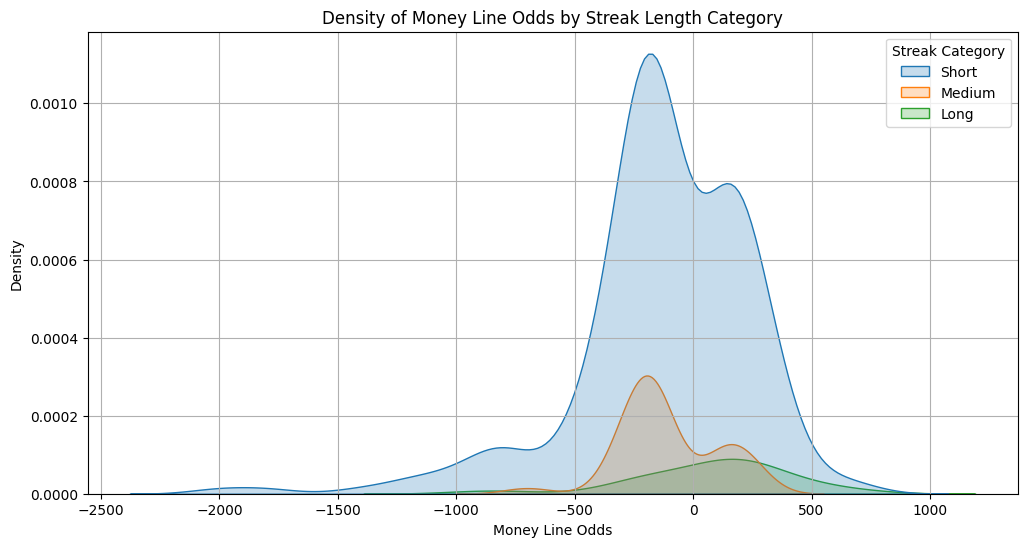

In [6]:
#  Density Plot of Money Line Odds for Different Streak Lengths
streaks_with_bets['Streak Category'] = pd.cut(streaks_with_bets['Streak Length'], bins=[0, 10, 20, float('inf')], labels=['Short', 'Medium', 'Long'])

plt.figure(figsize=(12, 6))
sns.kdeplot(data=streaks_with_bets, x='Money Line', hue='Streak Category', fill=True)
plt.title('Density of Money Line Odds by Streak Length Category')
plt.xlabel('Money Line Odds')
plt.ylabel('Density')
plt.grid(True)
plt.show()

 this density plot offers insights into how the distribution of money line odds varies with different lengths of winning streaks, any trends or patterns that may exist between the streaks and the odds offered by bookmakers
 

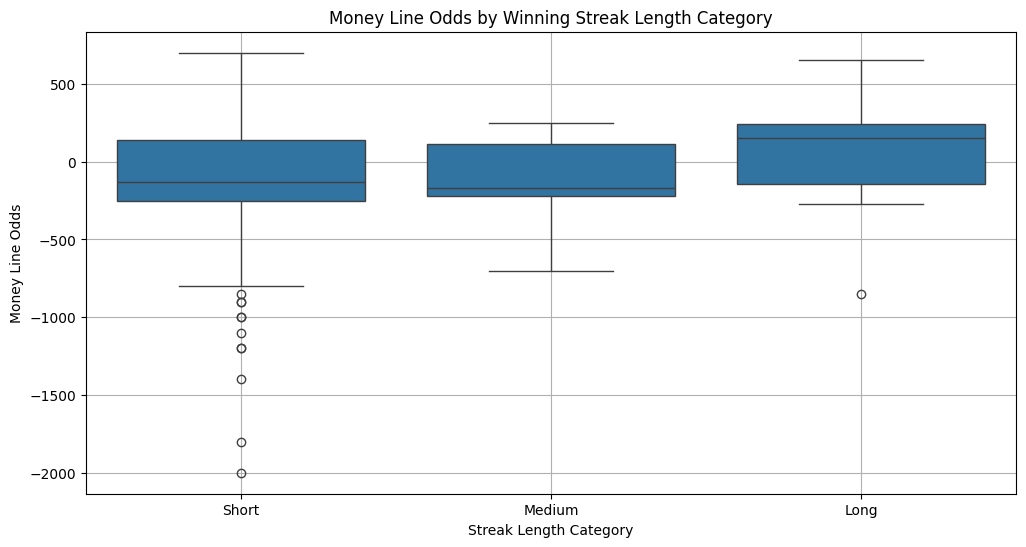

In [7]:
# Boxplot of Money Line Odds by Streak Length Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Streak Category', y='Money Line', data=streaks_with_bets)
plt.title('Money Line Odds by Winning Streak Length Category')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.grid(True)
plt.show()


this boxplot is an effective in visually assessing the relationship between the length of winning streaks and the corresponding money line odds, showing differences in variance, median, and outliers within each category

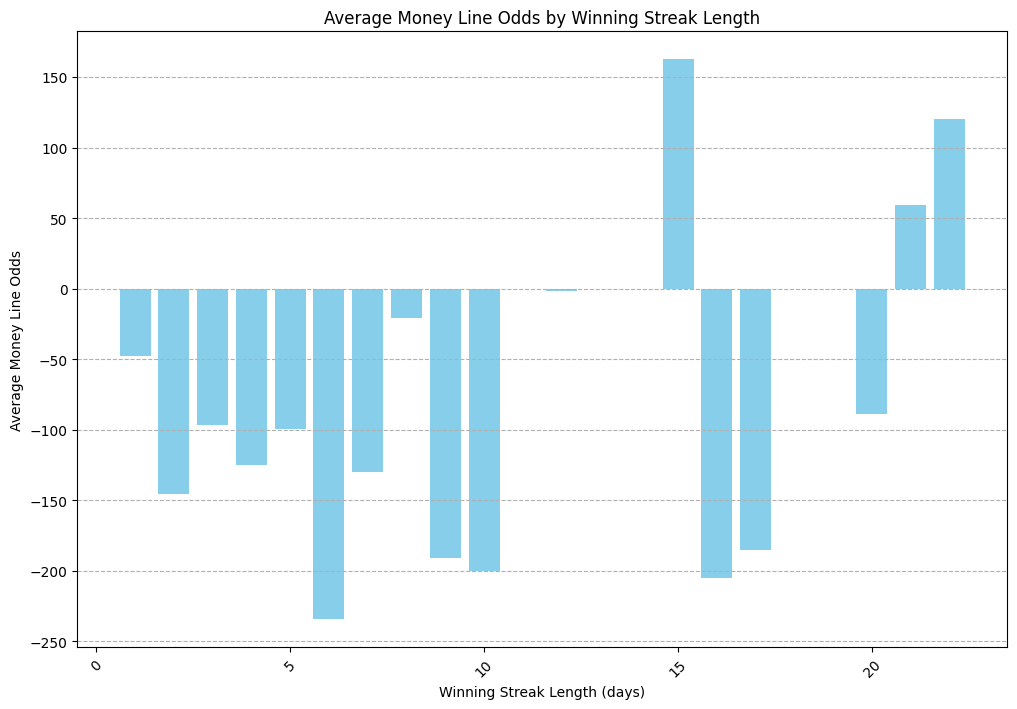

In [8]:
average_money_line_by_streak = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_money_line_by_streak['Streak Length'], average_money_line_by_streak['Money Line'], color='skyblue')

plt.title('Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


this bar chart show a clear and detailed comparison of how the average money line odds differs with different winning streak lengths. it highlights trends or patterns in the betting odds as streaks extend over time. this does show very little effect of individual player on a win streak

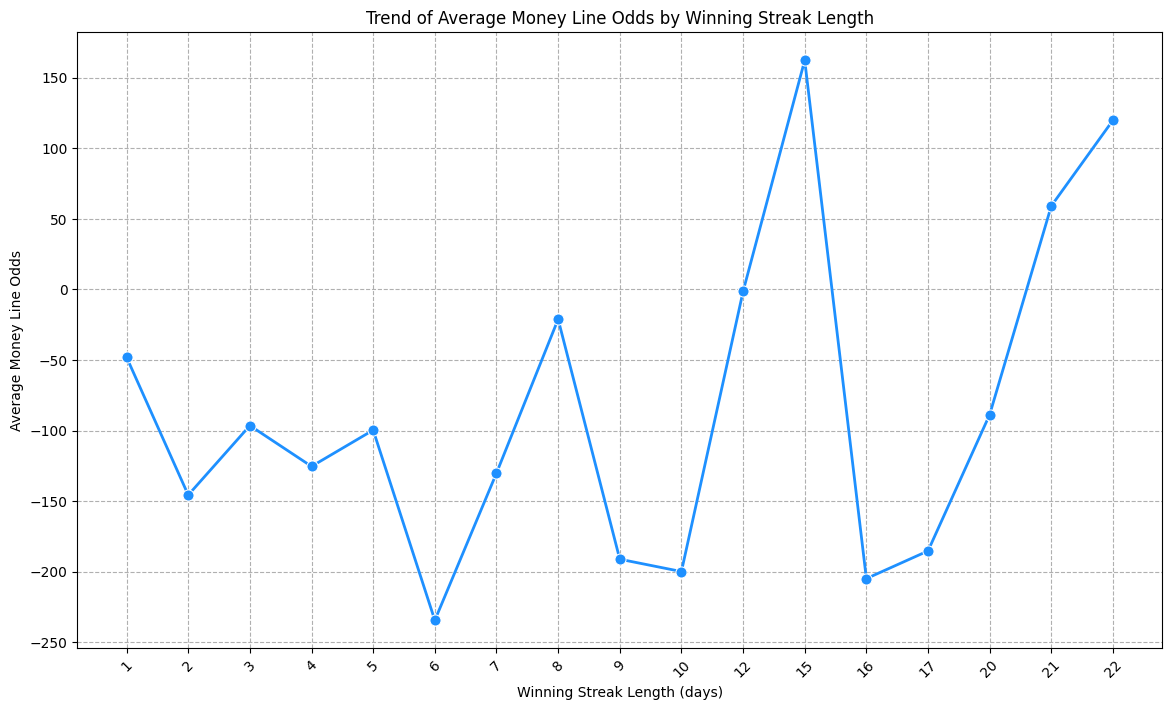

In [9]:
average_money = streaks_with_bets.groupby('Streak Length')['Money Line'].mean().reset_index()

average_money['Streak Length'] = average_money['Streak Length'].astype(str)

plt.figure(figsize=(14, 8))
sns.lineplot(x='Streak Length', y='Money Line', data=average_money,
             marker='o', markersize=8, color='dodgerblue', linewidth=2)

plt.title('Trend of Average Money Line Odds by Winning Streak Length')
plt.xlabel('Winning Streak Length (days)')
plt.ylabel('Average Money Line Odds')
plt.grid(True, which='both', linestyle='--')
plt.xticks(rotation=45)

plt.show()

this chart provides a clear visualization of how the average money line odds evolve with the length of winning streaks. gives valuable insights into the dynamics of betting odds in relation to player performance. this show how player wind streak does effect money line odds

C:\Users\mAs-\AppData\Local\Temp\ipykernel_2128\1308119369.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)


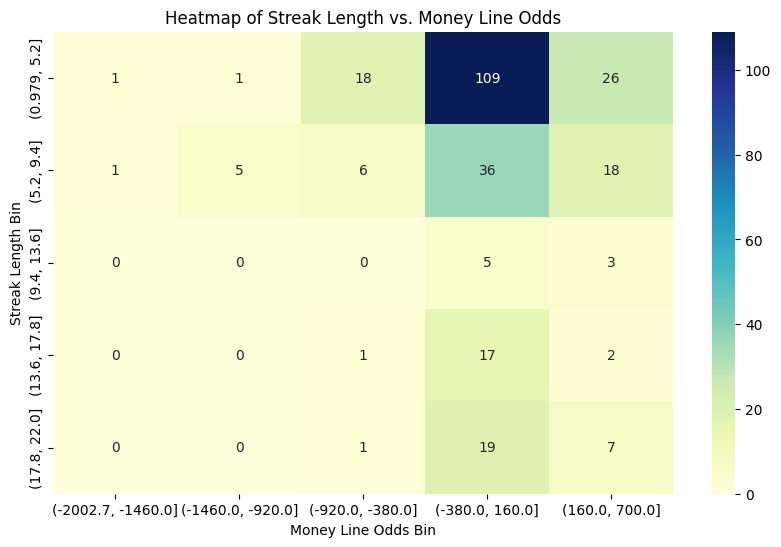

In [10]:
streaks_with_bets['Streak Length Bin'] = pd.cut(streaks_with_bets['Streak Length'], bins=5)
streaks_with_bets['Money Line Bin'] = pd.cut(streaks_with_bets['Money Line'], bins=5)

heatmap_data = streaks_with_bets.pivot_table(index='Streak Length Bin', columns='Money Line Bin', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Streak Length vs. Money Line Odds')
plt.xlabel('Money Line Odds Bin')
plt.ylabel('Streak Length Bin')
plt.show()

This heatmap effectively illustrates the distribution and frequency of combinations between different ranges of winning streak lengths and money line odds, offering insights into which combinations are most common and potentially highlighting trends or patterns in the data, such as preferred odds for certain streak lengths.

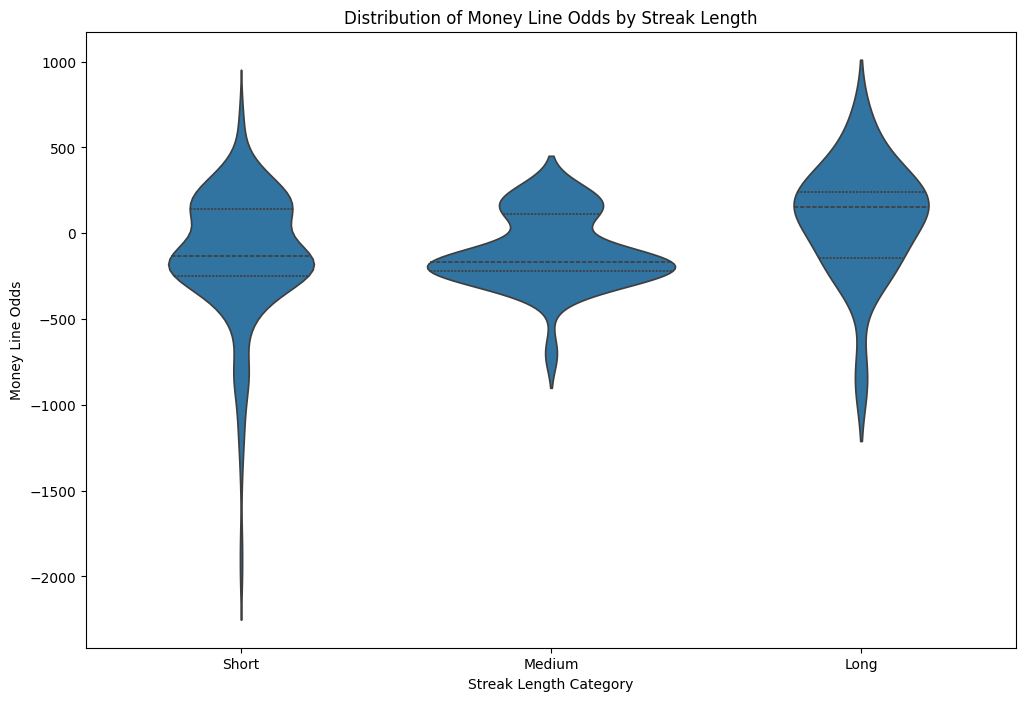

In [11]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Streak Category', y='Money Line', data=streaks_with_bets, inner='quartile')
plt.title('Distribution of Money Line Odds by Streak Length')
plt.xlabel('Streak Length Category')
plt.ylabel('Money Line Odds')
plt.show()


this violin plot offers a comprehensive look at how the distribution of money line odds differs by streak length category, revealing both the central tendency and variability within each category

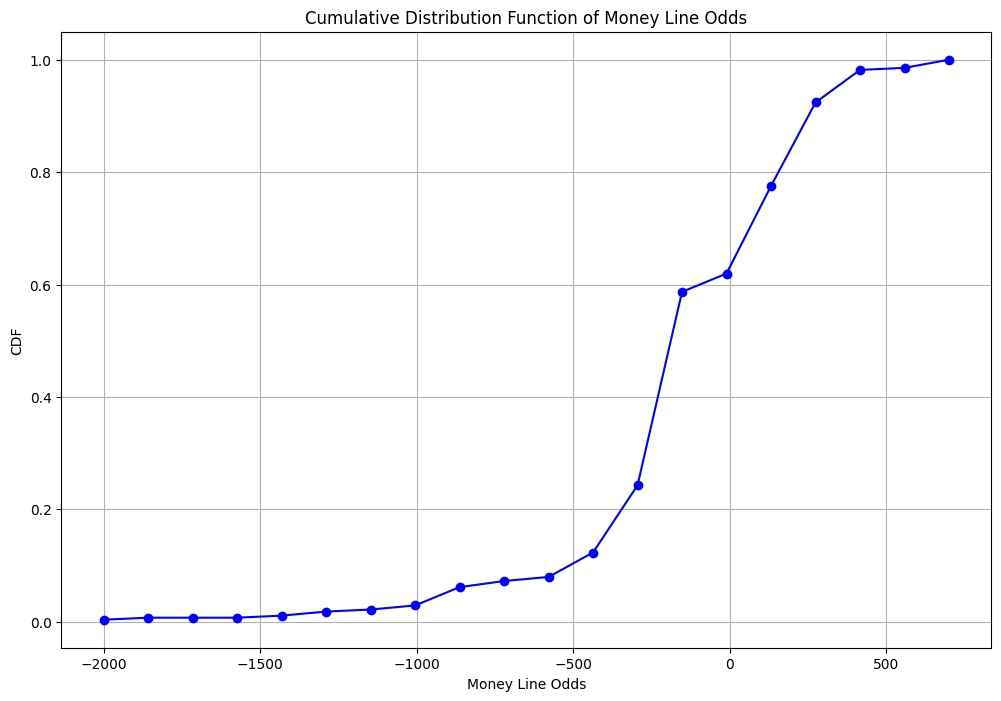

In [12]:
a = streaks_with_bets['Money Line'].dropna()

num_bins = 20
cumfreq_result, _ = np.histogram(a, bins=num_bins)
x = np.linspace(min(a), max(a), num=len(cumfreq_result))

cdf = np.cumsum(cumfreq_result) / np.sum(cumfreq_result)

plt.figure(figsize=(12, 8))
plt.plot(x, cdf, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Distribution Function of Money Line Odds')
plt.xlabel('Money Line Odds')
plt.ylabel('CDF')
plt.grid(True)
plt.show()


this CDF plot offers a visual representation of the distribution of money line odds, making it easy to see the probability of odds falling below a particular value. This can be particularly useful for identifying the odds' range within which the majority of bets are placed and understanding the overall distribution.

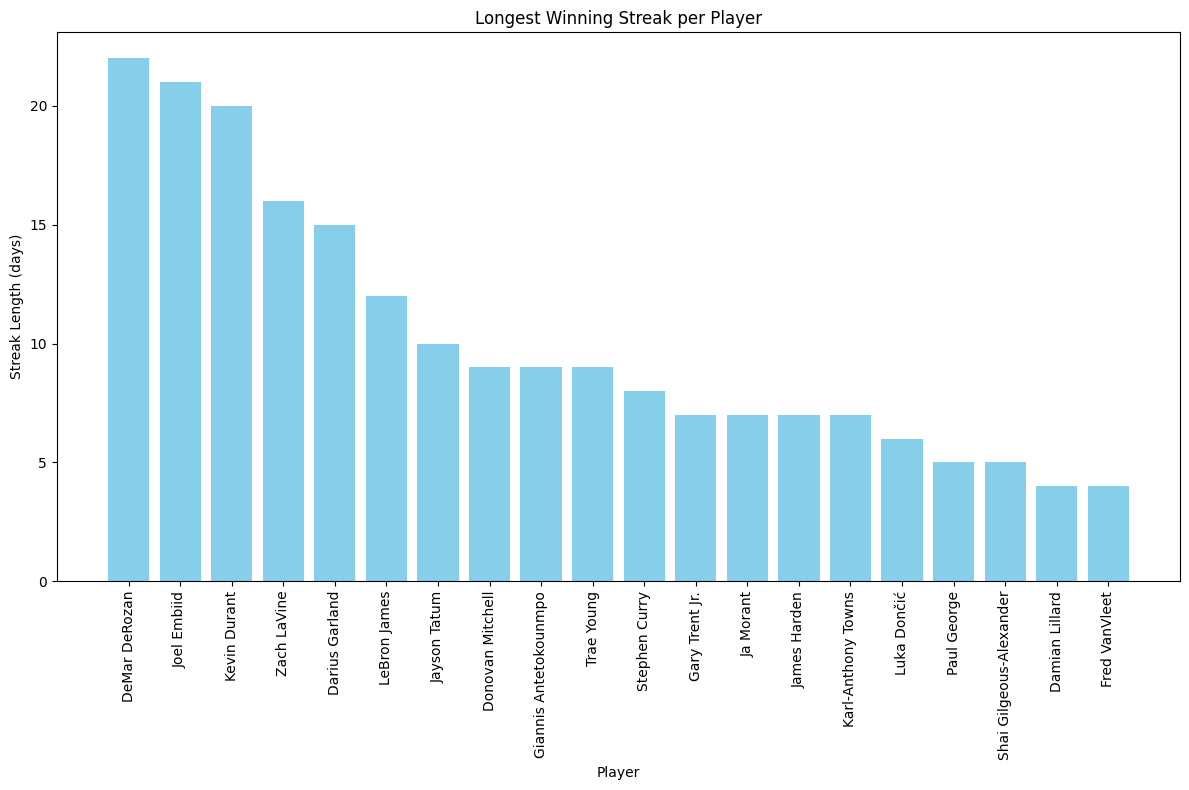

In [13]:
longest_streaks_player = streaks_with_bets.groupby('Player')['Streak Length'].max().reset_index()

plt.figure(figsize=(12, 8))

top_streaks_player = longest_streaks_player.nlargest(20, 'Streak Length')

plt.bar(top_streaks_player['Player'], top_streaks_player['Streak Length'], color='skyblue')
plt.title('Longest Winning Streak per Player')
plt.xlabel('Player')
plt.ylabel('Streak Length (days)')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

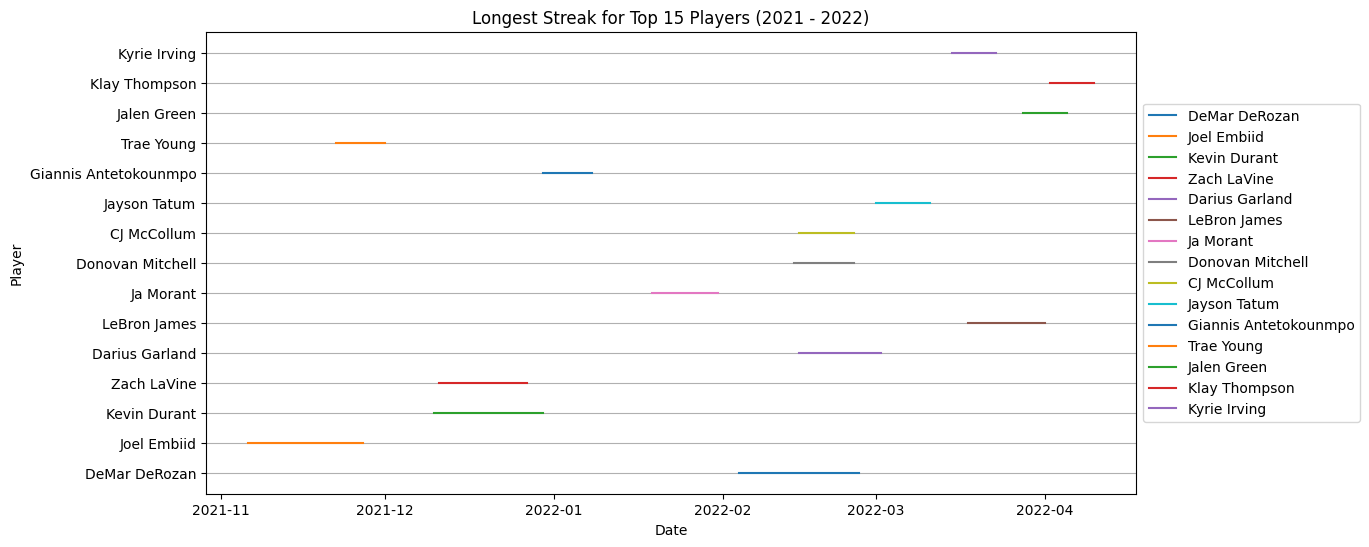

In [14]:
player_streaks['Streak Started'] = pd.to_datetime(player_streaks['Streak Started'])
player_streaks['Streak Ended'] = pd.to_datetime(player_streaks['Streak Ended'])

player_streaks_filtered = player_streaks[(player_streaks['Streak Started'].dt.year >= 2021) & (player_streaks['Streak Ended'].dt.year <= 2022)]


player_streaks_filtered['Streak Duration'] = (player_streaks_filtered['Streak Ended'] - player_streaks_filtered['Streak Started']).dt.days

top_15_players = player_streaks_filtered.groupby('Player')['Streak Duration'].max().nlargest(15).index


plt.figure(figsize=(12, 6))
for player in top_15_players:
    player_data = player_streaks_filtered[player_streaks_filtered['Player'] == player]
    longest_streak = player_data.loc[player_data['Streak Duration'].idxmax()]
    plt.plot([longest_streak['Streak Started'], longest_streak['Streak Ended']], [player, player], label=player)

plt.xlabel('Date')
plt.ylabel('Player')
plt.title('Longest Streak for Top 15 Players (2021 - 2022)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(axis='y')
plt.show()

This visualization effectively highlights the players with the most extended periods of success. this is to see if big name are on this list for explotatory reason and to help form questions.

#### What affects betting over/unders lines? (Ronak Chaudhuri)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("NBA_2021_2022_Bet_Outcomes.csv")

In [33]:
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

home_team_score = df["Final"]
away_team_score = df["Final"].shift(-1)  # Shifting to align away team scores

In [34]:
# Calculate total score
total_score = home_team_score + away_team_score

From the cv file, we have gathered all the home team and away team total scores as well as the total over under scores from each game for comparison to see how accurate the over/under line are that are set by the betting odds makers

In [35]:
over_under = df.loc[df["Close"].gt(200), "Close"]


print("Total Score:")
print(total_score)
print("\nOver/Under Closed:")
print(over_under)

Total Score:
0       231.0
1       248.0
2       235.0
3       236.0
4       245.0
        ...  
2641    191.0
2642    198.0
2643    207.0
2644    193.0
2645      NaN
Name: Final, Length: 2646, dtype: float64

Over/Under Closed:
0       233.5
2       226.5
5       223.0
7       218.0
8       223.0
        ...  
2636    213.5
2638    214.5
2640    213.5
2642    211.0
2644    211.5
Name: Close, Length: 1320, dtype: float64


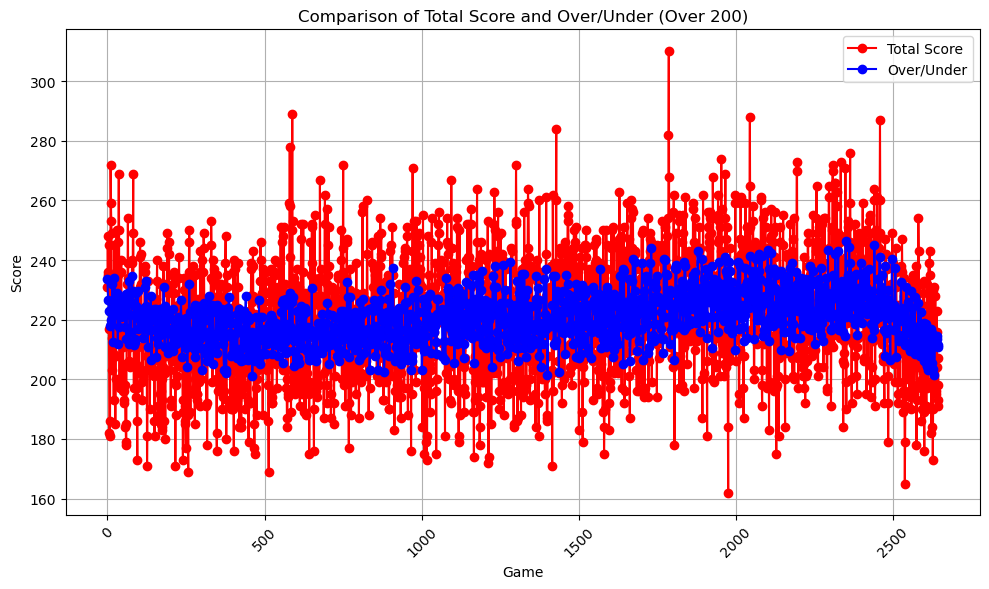

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_score.index, total_score, marker='o', linestyle='-', color='r', label="Total Score")
ax.plot(over_under.index, over_under, marker='o', linestyle='-', color='b', label="Over/Under")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Over/Under (Over 200)")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

As we can see here, this is a mapping of all the over unders for every game in the season and the the total score of the same game. Clearly there is quite a big discrepancy, and what seems like a big loophole to make money. 

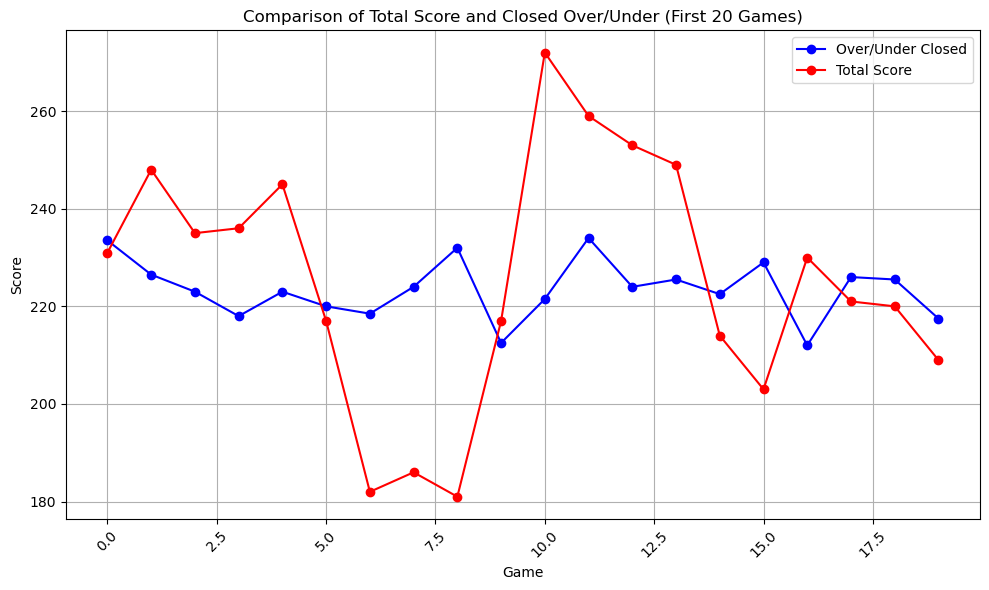

In [43]:
over_under = over_under.reset_index(drop=True)
total_score = total_score.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(over_under[:20], marker='o', linestyle='-', color='b', label="Over/Under Closed")
ax.plot(total_score[:20], marker='o', linestyle='-', color='r', label="Total Score")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Closed Over/Under (First 20 Games)")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

A more zoomed in look at just the first twenty games of the season, and it still seems like the odds makers were not very accurate making the over/under lines. 

#### How accurate are moneyline odds when compared to seasonal team standings? (Kevin Pereira)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Below, we can see the overall standings of the Eastern and Western Conferences, displayed are the teams as well as their overall win loss percentage from the 2020-21 season.

                   Team   W/L%
0   Philadelphia 76ers*  0.681
1        Brooklyn Nets*  0.667
2      Milwaukee Bucks*  0.639
3      New York Knicks*  0.569
4        Atlanta Hawks*  0.569
5           Miami Heat*  0.556
6       Boston Celtics*  0.500
7   Washington Wizards*  0.472
8        Indiana Pacers  0.472
9     Charlotte Hornets  0.458
10        Chicago Bulls  0.431
11      Toronto Raptors  0.375
12  Cleveland Cavaliers  0.306
13        Orlando Magic  0.292
14      Detroit Pistons  0.278


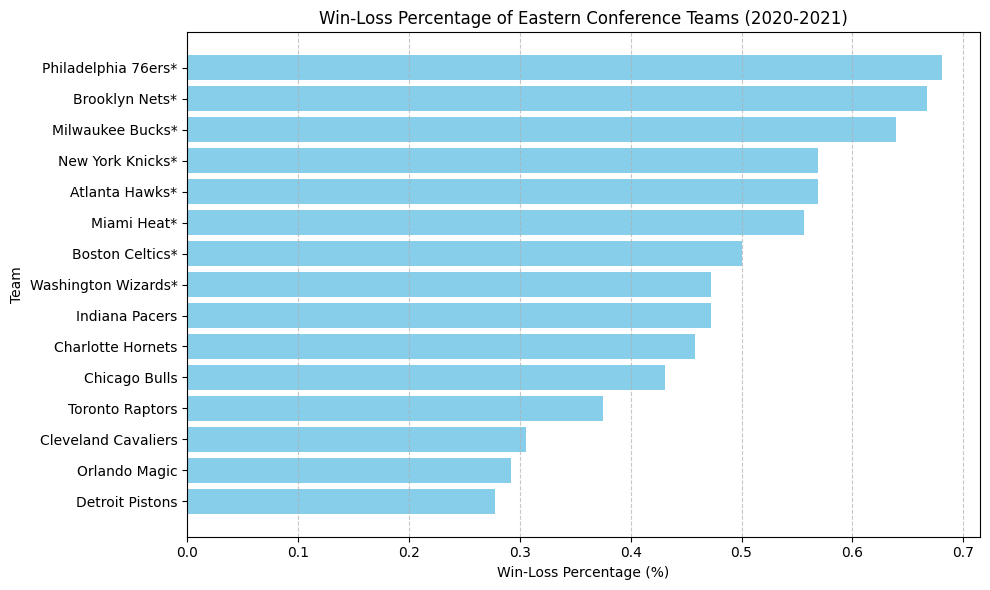

In [32]:
E_standings = pd.read_csv('2020_21_E_Standings.csv')

teams_and_wl_e = E_standings[['Team','W/L%']]

print(teams_and_wl_e)

team_and_wl = E_standings[['Team', 'W/L%']]

team_and_wl_sorted = team_and_wl.sort_values(by='W/L%', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_and_wl_sorted['Team'], team_and_wl_sorted['W/L%'], color='skyblue')
plt.xlabel('Win-Loss Percentage (%)')
plt.ylabel('Team')
plt.title('Win-Loss Percentage of Eastern Conference Teams (2020-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest W/L% at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This horizontal bar chart serves as a visual representation for the overall win-loss percentages for eastern conference teams.

                       Team   W/L%
0                Utah Jazz*  0.722
1             Phoenix Suns*  0.708
2           Denver Nuggets*  0.653
3     Los Angeles Clippers*  0.653
4         Dallas Mavericks*  0.583
5   Portland Trail Blazers*  0.583
6       Los Angeles Lakers*  0.583
7     Golden State Warriors  0.542
8        Memphis Grizzlies*  0.528
9         San Antonio Spurs  0.458
10     New Orleans Pelicans  0.431
11         Sacramento Kings  0.431
12   Minnesota Timberwolves  0.319
13    Oklahoma City Thunder  0.306
14          Houston Rockets  0.236


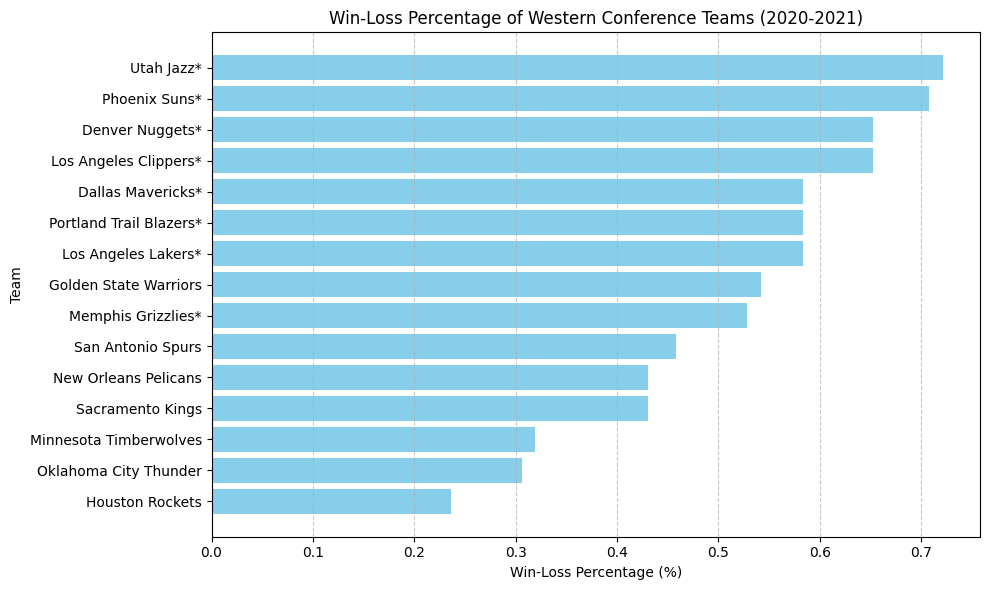

In [34]:
W_standings = pd.read_csv('2020_21_W_Standings.csv')

teams_and_wl_w = W_standings[['Team','W/L%']]

print(teams_and_wl_w)

team_and_wl_sorted = teams_and_wl_w.sort_values(by='W/L%', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(team_and_wl_sorted['Team'], team_and_wl_sorted['W/L%'], color='skyblue')
plt.xlabel('Win-Loss Percentage (%)')
plt.ylabel('Team')
plt.title('Win-Loss Percentage of Western Conference Teams (2020-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest W/L% at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This horizontal bar chart serves as a visual representation for the overall win-loss percentages for Western conference teams.

What is Moneyline?

Moneyline is one of the easiest wagers for first time bettors to get into. The basis of it revolves around an underdog and a favorite. 
Bettor's can choose to bet for their favorite teams or whoever they precieve will have the highest chances of winning. The way that moneyline bets are typically displayed is by giving the favorite (the team with the higher probability of winning) a negative score i.e. -200 or -150, and giving the underdog (the team with a lower probability of winning) a positive score i.e. +200 or +150. The bets a team gets, makes that team the favorite to win, the team with the lower amount of bets makes that team the underdog.

Now lets take a look at the overall bet outcomes from the 2021-22 season and focus on the moneyline odds.

In [25]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

filter1 = df['ML'] < 0

df.where(filter1, inplace=True)

df = df.dropna()

df = df.groupby('Team')['ML'].count()

df


Team
Atlanta         54
Boston          78
Brooklyn        58
Charlotte       31
Chicago         50
Cleveland       40
Dallas          56
Denver          54
Detroit          7
Golden State     1
GoldenState     79
Houston          7
Indiana         36
LAClippers      43
LALakers        45
Memphis         61
Miami           70
Milwaukee       75
Minnesota       48
NewOrleans      24
NewYork         41
OklahomaCity     4
Orlando          9
Philadelphia    65
Phoenix         83
Portland        30
Sacramento      27
SanAntonio      31
Toronto         46
Utah            79
Washington      32
Name: ML, dtype: int64

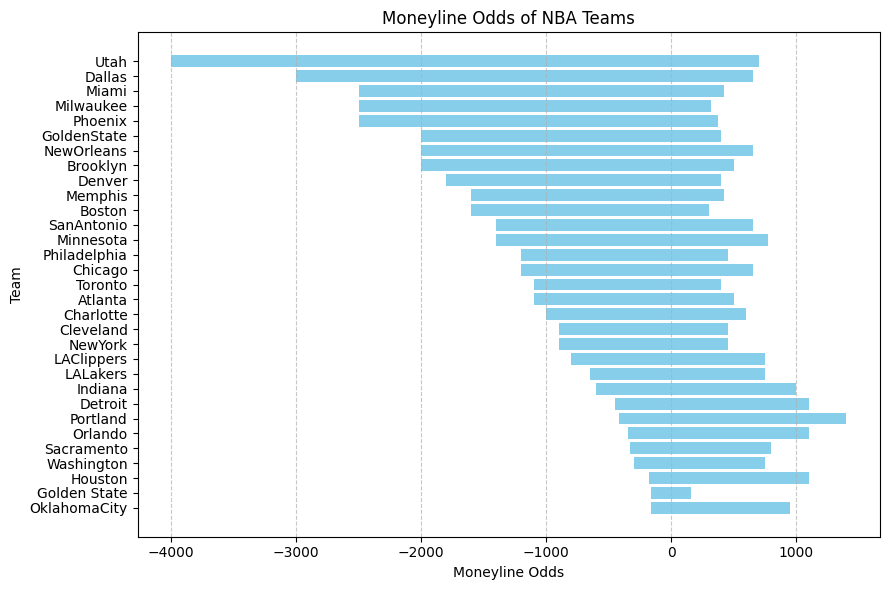

In [24]:
df = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')

team_and_ml = df[['Team', 'ML']]

team_and_ml_sorted = team_and_ml.sort_values(by='ML')

plt.figure(figsize=(9, 6))
plt.barh(team_and_ml_sorted['Team'], team_and_ml_sorted['ML'], color='skyblue')
plt.xlabel('Moneyline Odds')
plt.ylabel('Team')
plt.title('Moneyline Odds of NBA Teams')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ML at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This barchart shows the moneyline odds of differernt teams. Negative odds means that the team is considered the favorite. Positive moneyline odds means that the team is considered the underdog.


**Conclusion**

By comparing all three charts we can see that teams with a higher standing from the previous season are typically considered the favorite when it comes to moneyline odds in the next season.

In conclusion it seems that people may bet more often on teams that had a higher overall standing in previous seasons. It looks like the better a team does overall, the more likely they are to be considered the favorite when it comes to sports book moneyline odds. Other factors like player injury, team/management changes may also affect how people bet on certain teams.

#### How do referees affect point spread? (Isaias Hernandez)

In [45]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

**NBA_Referee_Assignments_21-22.cvs** was collected from the Official NBA website. The data in this csv represents the referees assigned to each game in the 2021-2022 NBA Season.  

In [89]:
game_outcomes = pd.read_csv('NBA_2021_2022_Bet_Outcomes.csv')
game_outcomes.head()

,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Home/Away
0,1019,501,V,Brooklyn,25,34,26,19,104,240.5,233.5,105,2,0
1,1019,502,H,Milwaukee,37,29,31,30,127,pk,1.5,-125,114,1
2,1019,503,V,GoldenState,32,21,30,38,121,230.5,226.5,140,111.5,0
3,1019,504,H,LALakers,34,25,26,29,114,4.5,3.5,-160,pk,1
4,1020,505,V,Indiana,38,37,13,34,122,228.5,1.5,-125,110.5,0


In [77]:
referee_assignments = pd.read_csv('NBA_Referee_Assignments_21-22.csv')
referee_assignments.head()

,date,game visitor,chief,crew1,crew2
0,1019,Brooklyn,Josh Tiven,Jacyn Goble,Natalie Sago
1,1019,Golden State,Sean Wright,Mark Lindsay,Ray Acosta
2,1020,Indiana,Rodney Mott,Scott Wall,Nate Green
3,1020,Chicago,Tyler Ford,Derek Richardson,Mousa Dagher
4,1020,Boston,Scott Foster,Ed Malloy,Lauren Holtkamp


In [79]:
referee_stats = pd.read_csv('NBA_Referee_Stats_21-22.csv')
referee_stats.head()

,referee,role,experience,games officiated,home team win%,home team points differential,total points per game,called fouls per game,foul% against road teams,foul% against home team,foul differential
0,Ray Acosta,CREW,5,64,0.438,-1.344,222.813,39.500,50.316,49.684,0.3
1,Jacyn Goble,CREW,6,64,0.500,1.438,223.375,40.703,49.559,50.442,-0.4
2,Natalie Sago,CREW,4,63,0.524,2.333,223.952,39.540,50.501,49.498,0.4
3,Mitchell Ervin,CREW,8,63,0.492,-0.222,224.190,40.746,49.864,50.136,-0.1
4,Gediminas Petraitis,CREW,8,60,0.533,-0.150,226.083,40.933,52.118,47.883,1.7


In [90]:
game_outcomes = game_outcomes.drop(game_outcomes[(game_outcomes['Date'] > 410) & (game_outcomes['Date'] < 700)].index) # Keeps only the NBA regular season games

game_outcomes['Team'] = game_outcomes['Team'].replace('LAClippers', 'LA Clippers')
game_outcomes['Team'] = game_outcomes['Team'].replace('LALakers', 'LA Lakers')
game_outcomes['Team'] = game_outcomes['Team'].replace('GoldenState', 'Golden State')
game_outcomes['Team'] = game_outcomes['Team'].replace('SanAntonio', 'San Antonio')
game_outcomes['Team'] = game_outcomes['Team'].replace('NewYork', 'New York')
game_outcomes['Team'] = game_outcomes['Team'].replace('OklahomaCity', 'Oklahoma City')
game_outcomes['Team'] = game_outcomes['Team'].replace('NewOrleans', 'New Orleans') 
game_outcomes['Open'] = game_outcomes['Open'].replace('pk', 0) 
game_outcomes['Close'] = game_outcomes['Close'].replace('pk', 0) 
game_outcomes.head()


,Date,Rot,VH,Team,1st,2nd,3rd,4th,Final,Open,Close,ML,2H,Home/Away
0,1019,501,V,Brooklyn,25,34,26,19,104,240.5,233.5,105,2,0
1,1019,502,H,Milwaukee,37,29,31,30,127,0,1.5,-125,114,1
2,1019,503,V,Golden State,32,21,30,38,121,230.5,226.5,140,111.5,0
3,1019,504,H,LA Lakers,34,25,26,29,114,4.5,3.5,-160,pk,1
4,1020,505,V,Indiana,38,37,13,34,122,228.5,1.5,-125,110.5,0


In [91]:
game_outcomes['Open'] = game_outcomes['Open'].astype(float)
game_outcomes['Close'] = game_outcomes['Close'].astype(float)

In [92]:
game_outcomes.describe()

,Date,Rot,1st,2nd,3rd,4th,Final,Open,Close,ML,Home/Away
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2458.000000,2460.000000,2460.000000
mean,623.336585,540.322764,27.947967,27.907724,27.600813,26.607317,110.615854,112.988211,113.581977,-46.077236,0.500000
std,455.617776,23.583530,6.061007,5.975143,5.992404,6.062594,12.620400,107.739311,107.623855,409.242595,0.500102
min,101.000000,501.000000,8.000000,9.000000,8.000000,8.000000,75.000000,0.000000,0.000000,-4000.000000,0.000000
25%,211.000000,520.000000,24.000000,24.000000,24.000000,22.000000,102.000000,5.000000,5.500000,-220.000000,0.000000
50%,330.000000,540.000000,28.000000,28.000000,28.000000,27.000000,110.000000,18.500000,199.500000,-110.000000,0.500000
75%,1117.000000,560.000000,32.000000,32.000000,32.000000,31.000000,119.000000,220.500000,220.500000,190.000000,1.000000
max,1231.000000,600.000000,48.000000,49.000000,55.000000,48.000000,158.000000,244.500000,246.500000,1400.000000,1.000000


In [93]:
# Cleaning data so we know what rows correspond to what game
def assign_game_numbers(game):
    game['Game'] = game.index[0] // 2 + 1
    return game

game_outcomes = game_outcomes.groupby(game_outcomes.index // 2).apply(assign_game_numbers)
# game_outcomes.to_csv('visiting_team.csv', sep=',', index=False, encoding='utf-8')


In [116]:
# Calculate the final score difference
final_diff = game_outcomes.merge(game_outcomes, on='Game', suffixes=('_away', '_home'))

final_diff = final_diff[final_diff['VH_away'] == 'V']
final_diff = final_diff[final_diff['VH_home'] == 'H']

final_diff['Score Difference'] = final_diff['Final_away'] - final_diff['Final_home']

# Select relevant columns
score_diffs = final_diff[['Score Difference']]
score_diffs.head()

,Score Difference
1,-23
5,7
9,-1
13,6
17,15


In [84]:
# Get the point spread to the visiting team since the referee data only has visiting team 
point_spreads = game_outcomes[game_outcomes['Open'] < 31].reset_index(drop=True)
# table holds the rows that contain the opening point spread
point_spreads.describe()
# Table holds nba outcomes 


# refs = referee_assignments[['date', 'game visitor']]
# visiting_team.to_csv('visiting_team.csv', sep=',', encoding='utf-8')
# refs.to_csv('visiting_refs.csv', sep=',', encoding='utf-8')


,Date,Rot,1st,2nd,3rd,4th,Final,Open,Close,ML,Home/Away
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,624.056818,540.428571,28.966721,28.623377,28.221591,26.995942,113.362825,5.752029,26.599432,-317.264610,0.654221
std,455.693708,23.594801,6.002141,6.136893,5.810611,5.992073,12.667427,3.691274,62.659914,370.095693,0.475815
min,101.000000,501.000000,10.000000,9.000000,11.000000,9.000000,77.000000,0.000000,0.000000,-4000.000000,0.000000
25%,211.000000,520.000000,25.000000,24.000000,24.000000,23.000000,104.000000,3.000000,4.000000,-360.000000,0.000000
50%,330.000000,540.000000,29.000000,28.000000,28.000000,27.000000,114.000000,5.000000,6.500000,-215.000000,1.000000
75%,1117.000000,560.000000,33.000000,33.000000,32.000000,31.000000,122.000000,8.000000,10.000000,-150.000000,1.000000
max,1231.000000,599.000000,48.000000,49.000000,55.000000,48.000000,157.000000,22.000000,242.500000,700.000000,1.000000


In [130]:
ref_spreads = referee_stats[referee_stats['role'] == 'CHIEF'].reset_index(drop=True)
ref_spreads = ref_spreads[['referee','home team points differential']]

ref_spreads.head()
len(ref_spreads)

46

In [131]:
# merging all data to put into the ML model
columns_merging = ['chief','Open']
dfs = [referee_assignments[['chief']], point_spreads[['Open']]]
ref_v_open = pd.concat(dfs, axis=1)
ref_v_open = ref_v_open.drop(ref_v_open.index[-2:])
ref_v_open = ref_v_open.rename(columns={'chief': 'referee'})
ref_v_open = ref_v_open.merge(ref_spreads, on='referee')


ref_v_open.to_csv('visiting_refs.csv', sep=',', index=False, encoding='utf-8')

In [133]:
# Function to placing a bet 'yes' or 'no' based on difference
def calculate_difference(row):
    diff = row['Open'] - row['home team points differential']
    if diff < 0:
        return 'yes'
    else:
        return 'no'

# add new column if its a good bet
ref_v_open['result'] = ref_v_open.apply(calculate_difference, axis=1)
ref_v_open.to_csv('visiting_refs.csv', sep=',', index=False, encoding='utf-8')


## ML Analyses

In [155]:
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoder = LabelEncoder()
ref_v_open['result'] = label_encoder.fit_transform(ref_v_open['result'])

# Define X and y
X = ref_v_open[['referee', 'Open']]  # Features
y = ref_v_open['result']              # Target

# One-hot encode 'referee' column
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(len(y_pred), y_pred)


246 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


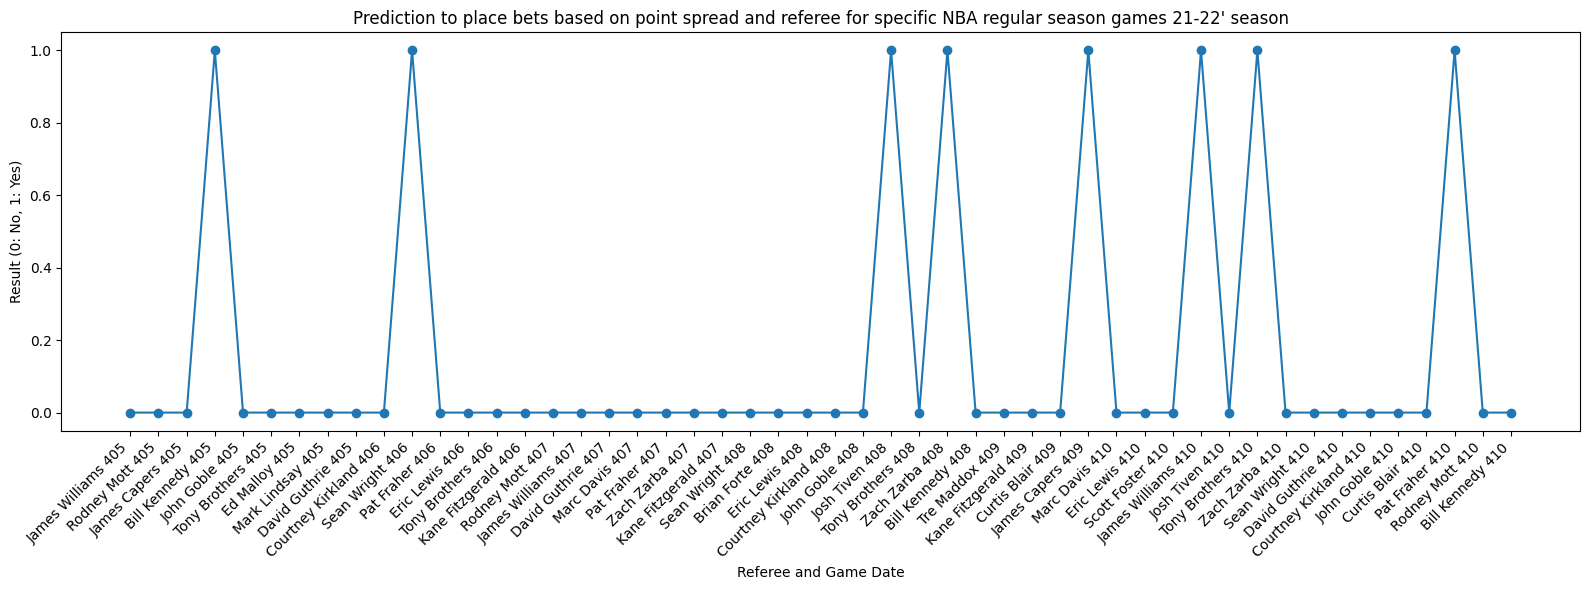

In [165]:
import matplotlib.pyplot as plt

referee_assignments['Referee_Game'] = referee_assignments['chief'] + ' ' + referee_assignments['date'].astype(str)

# Extract the last 246 items
last_246_df = referee_assignments.tail(50)

# Plot
plt.figure(figsize=(16, 6))
plt.plot(last_246_df['Referee_Game'], y_pred[-50:], marker='o', linestyle='-')
plt.xlabel('Referee and Game Date')
plt.ylabel('Result (0: No, 1: Yes)')
plt.title('Prediction to place bets based on point spread and referee for specific NBA regular season games 21-22\' season')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Created by Isaias Hernandez** 

Point spreads usually open 12 to 20 hours before an nba game. Referees are usually always assigned at 9am the day of the game. This means if a game is at 7pm a bettor can have an advantage if they know that a certain referee keeps games close. This ML model is shows that if the opening point spread is greatly different than what the game referee averages then the bettor should place a bet.   
Assumptions we are making in order to clean our data is that the highest opening spread recorded was 22. The predictions are based on the last 50 regular season games for the 21-22 regular season.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [48]:
X = np.arange(len(over_under)).reshape(-1, 1)  # Using game index as feature
y = over_under

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train MSE: 64.2925754990198
Test MSE: 68.72168256202619
Train R^2: 0.09928195957350172
Test R^2: 0.09918088883683762


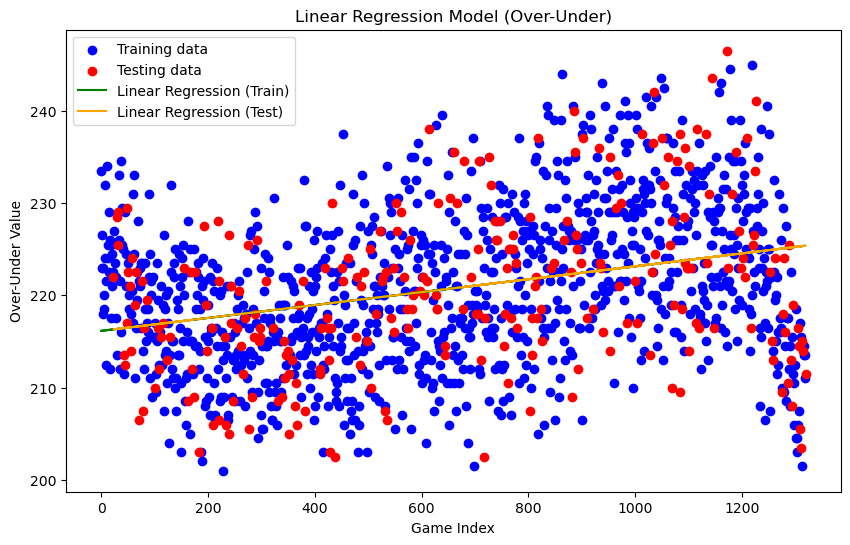

In [51]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_pred_train, color='green', label='Linear Regression (Train)')
plt.plot(X_test, y_pred_test, color='orange', label='Linear Regression (Test)')
plt.title('Linear Regression Model (Over-Under)')
plt.xlabel('Game Index')
plt.ylabel('Over-Under Value')
plt.legend()
plt.show()

## Reflection

#### What is the most challenging part of the project that you’ve encountered so far?

Find data for what we were looking for. A lot of the useful and specific data was behind a paywall and somewhat hard to find for free. Some CSVs had a weird date format and had to be cleaned and changed to make it usable with other data. Having some data from a different time frame like we had some data 2022-2023 which was hard to use with the data we had from 2021-2022. It was hard to find different data from different time frames.

#### What are your initial insights?

It seems like with our analysis of the year 2021-2022, when players are on a winning streak it might affect how people bet on games shown by changes in betting odds. But to really understand how much of an effect hot streak and referees have or what effect money-line and over/under, we need to do more detailed math and analysis. It's not as simple as it seems because many different things could influence this relationship. This also makes us ask the question that does team winning have a bigger effect on money lines. At the moment the individual player and referee or money-line and over/under has very little effect on odds. more analysis is needed as well as more data.

#### Are there any concrete results you can show at this point? If not, why not?

Currently it is hard to show concrete results up to this point since most of our findings are generalized. We also had some troubles finding 100%  clean data so making better models will require us to double check if data was cleaned correctly. We plan to implement more tests with more data to make our findings more concrete. 

#### Going forward, what are the current biggest problems you’re facing?

The biggest problem that we are facing is that some data is hard to get and requires a good amount of web scraping specifically when it comes to the betting data. So far, we have acquired good betting data, although it was difficult to find. However, when it comes to NBA data, most of it was very accessible and easy to put together.

#### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

We think that we are currently on the right track with our project. We still need more ML models which would probably require some more data which may require web scraping since a lot of the betting data was not in csv file and table form. 

#### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

It is definitely worth proceeding with the project since we acquired a lot of useful data already that can help out with future visualizations and data analyses. With our initial findings, we do feel that we have found some information to support our hypothesis. So, we will continue to build off of what we have currently. 


## Next Step

Our project consists of creating ML models and visualizations to give bettors informative input so that they can make decisions about future bets. We need to create 3 more machine learning models that will be focused on “What affects moneyline?”, “What affects over/under”,and “Do player hot streaks affect bet outcomes?. We also plan to make more tests on our current ML models and create even better visuals. We still need to create visuals to represent how referees affect point spread. We plan on using API’s to get future data on NBA games and then trying to predict the outcomes with our models as part of our real world implementation. 